<a href="" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math  as m
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import string 
import statistics as st
import time
from scipy.optimize import curve_fit
from IPython.display import display, Image
import matplotlib.cm as cm

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
def trojkat():
    x1=random.random()
    x2=random.random()
    if (1-x1-x2>0) and (-0.3+x1>0) and (-0.3+x2)>0:
        c=1
    else:
        c=0
    return np.array([x1,x2,c])

In [ ]:
probka_k=np.array([trojkat() for i in range(10000)])
print(probka_k.shape)

(10000, 3)


In [ ]:
def draw_result(X,y): 
  fig=plt.figure(figsize=(4,4))

  # dorysowanie okręgu
  #ax=fig.add_subplot(1,1,1)
  #circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
  #ax.add_patch(circ)

  plt.title("Działanie na próbce testowej",fontsize=16) 
  plt.xlim(min(X[:,0]),max(X[:,0]))
  plt.ylim(min(X[:,1]),max(X[:,1]))
  plt.scatter(X[:,0],X[:,1],c=y,
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=min(y), vmax=max(y)))

  plt.xlabel('$x_1$',fontsize=18)
  plt.ylabel('$x_2$',fontsize=18);

Shapes of datasets X_train, X_test, y_train, y_test:  (2000, 2) (8000, 2) (2000,) (8000,)


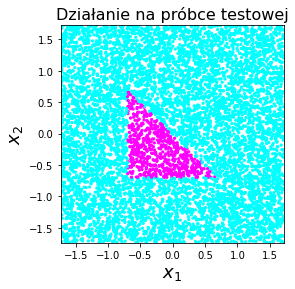

In [ ]:
X, y = probka_k[:,:2], probka_k[:,2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=32)

print("Shapes of datasets X_train, X_test, y_train, y_test: ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#narysuj dane testowe
draw_result(X_test, y_test)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(4,4), activation='tanh', alpha=0.1, 
                    learning_rate_init=0.01, early_stopping=True,validation_fraction=0.15,verbose=True,n_iter_no_change=100,max_iter=1000)
                    #max_iter=1000) 


print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = 0.69032425
Validation score: 0.793333
Iteration 2, loss = 0.48962893
Validation score: 0.923333
Iteration 3, loss = 0.37774870
Validation score: 0.923333
Iteration 4, loss = 0.32123996
Validation score: 0.923333
Iteration 5, loss = 0.29503640
Validation score: 0.923333
Iteration 6, loss = 0.28576502
Validation score: 0.923333
Iteration 7, loss = 0.28123836
Validation score: 0.923333
Iteration 8, loss = 0.27956485
Validation score: 0.923333
Iteration 9, loss = 0.27863960
Validation score: 0.923333
Iteration 10, loss = 0.27808013
Validation score: 0.923333
Iteration 11, loss = 0.27762184
Validation score: 0.923333
Iteration 12, loss = 0.27726788
Validation score: 0.923333
Iteration 13, loss = 0.27697328
Validation score: 0.923333
Iteration 14, loss = 0.27671276
Validation score: 0.923333
Iteration 15, loss = 0.27650582
Validation score: 0.923333
Iteration 16, loss = 0.27633126
Validation score: 0.923333
Iteration 17, loss = 0.27617936
Validation score: 0.923333
Iterat

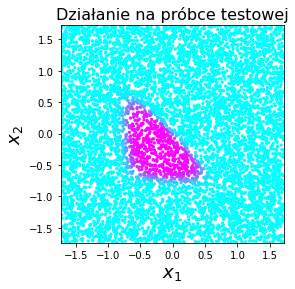

In [ ]:
draw_result(X_test,Z)

[0.7933333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333,

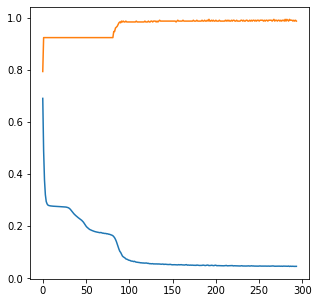

In [ ]:
fig=plt.figure(figsize=(5,5))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

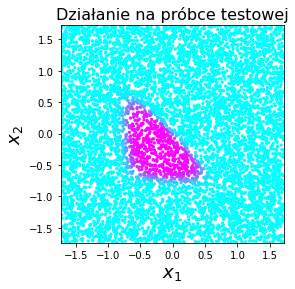

In [ ]:
draw_result(X_test, Z)

<Figure size 504x504 with 0 Axes>

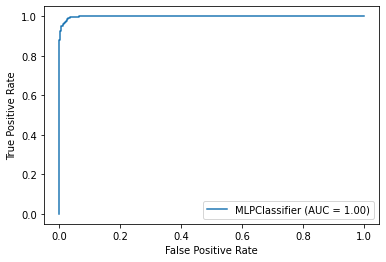

Area Under Curve AUC =  0.9985333910654244
Area Under Curve AUC =  0.9985333910654244


In [ ]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve, roc_auc_score

fig=plt.figure(figsize=(7,7))

roc_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

#Print AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print("Area Under Curve AUC = ",roc_auc)

#simpler method
print("Area Under Curve AUC = ",roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))